In [1]:
# Code to install packages if they aren't already on your computer
# !pip install python-math
# !pip install numpy
# !pip install matplotlib
# !pip install tensorflow

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


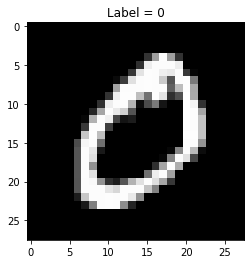

In [5]:
plt.imshow(train_images[1], cmap="gray")
plt.title(f"Label = {train_labels[1]}")
plt.show()

In [6]:
train_data = train_images.reshape([-1, 784, 1]) / 255.0
test_data = test_images.reshape([-1, 784, 1]) / 255.0

In [7]:
train_labels = tf.one_hot(tf.convert_to_tensor(train_labels), depth=10).numpy()
test_labels = tf.one_hot(tf.convert_to_tensor(test_labels), depth=10).numpy()

In [8]:
print(train_labels.shape, test_labels.shape)

(60000, 10) (10000, 10)


In [9]:
def softmax(x):
    """
    Parameters:
        x: shape (B, 10, 1)
    Returns:
        shape (B, 10)
    """
    ex = np.exp(x)
    summed = np.sum(ex, axis=1)
    return ex[:, :, 0] / summed

In [10]:
w = np.random.random([10, 784])
b = np.zeros([10, 1])

In [11]:
def forward(batch, w, b):
    """
    Parameters:
        batch: shape (B, 784, 1)
        w: shape (10, 784)
        b: shape (10, 1)
    Returns:
        p: shape (B, 10)
    """
    a = w @ batch + b
    p = softmax(a)
    return p

In [12]:
def gradients(batch_data, batch_labels, w, b):
    """
    Parameters:
        batch_data: shape (B, 784, 1)
        batch_labels: shape (B, 10)
        w: shape (10, 784)
        b: shape (10, 1)
    Returns:
        dw: shape (10, 784)
        db: shape (10, 1)
    """
    a = w @ batch_data + b
    p = softmax(a)
    da = batch_labels * (p - 1) # (B, 10) (B, 784, 1)
    dw = da[:, :, np.newaxis] * batch_data[:, np.newaxis, :, 0]
    dw = np.mean(dw, axis=0)
    db = da
    db = np.mean(db, axis=0)[:, np.newaxis]
    return dw, db

In [13]:
def loss(batch_labels, batch_preds):
    """
    Parameters:
        batch_labels: shape (B, 10)
        batch_preds: shape (B, 10)
    Returns:
        scalar
    """
    return np.sum(-batch_labels*np.log(batch_preds))

In [14]:
def evaluate(w, b):
    """
    Parameters:
        w: shape (10, 784)
        b: shape (10, 1)
    Returns:
        scalar
    """
    all_batch_preds = []
    all_batch_labels = []
    for i in range(10):
        batch_data = test_data[1000*i:1000*(i+1)]
        batch_labels = test_labels[1000*i:1000*(i+1)]
        batch_preds = forward(batch_data, w, b)
        batch_preds = np.argmax(batch_preds, axis=1)
        batch_preds = tf.one_hot(tf.convert_to_tensor(batch_preds.astype(np.int32)), depth=10).numpy()
        all_batch_preds.append(batch_preds)
        all_batch_labels.append(batch_labels)
    all_batch_preds = np.concatenate(all_batch_preds, axis=0)
    all_batch_labels = np.concatenate(all_batch_labels, axis=0)
    return np.sum(all_batch_preds * all_batch_labels) / 10000

In [15]:
learning_rate = 0.1
epochs = 50
all_losses = []
all_evaluations = []

In [16]:
for epoch in range(epochs):
    learning_rate *= 0.95
    loss_sum = 0
    for i in range(60):
        batch_data = train_data[1000*i:1000*(i+1)]
        batch_labels = train_labels[1000*i:1000*(i+1)]
        dw, db = gradients(batch_data, batch_labels, w, b)
        batch_preds = forward(batch_data, w, b)
        loss_sum += loss(batch_labels, batch_preds)
        if i == 59:
            all_losses.append(loss_sum/60)
            print(f"epoch {epoch} step {i} loss {loss_sum / (i + 1)}")
            evaluation_result = evaluate(w, b)
            all_evaluations.append(evaluation_result)
            print(f"evaluate {evaluation_result}")
        w = w - learning_rate * dw
        b = b - learning_rate * db

epoch 0 step 59 loss 3342.735461783309
evaluate 0.4517
epoch 1 step 59 loss 1416.1006170649598
evaluate 0.6562
epoch 2 step 59 loss 1035.2208053674815
evaluate 0.725
epoch 3 step 59 loss 903.0744336780305
evaluate 0.7566
epoch 4 step 59 loss 836.6623056437859
evaluate 0.7774
epoch 5 step 59 loss 798.3651177681521
evaluate 0.7914
epoch 6 step 59 loss 774.6928805212696
evaluate 0.8026
epoch 7 step 59 loss 759.4987454553235
evaluate 0.8119
epoch 8 step 59 loss 749.5867764467389
evaluate 0.818
epoch 9 step 59 loss 743.1383657904133
evaluate 0.822
epoch 10 step 59 loss 739.0462545105031
evaluate 0.826
epoch 11 step 59 loss 736.6004019924152
evaluate 0.8295
epoch 12 step 59 loss 735.3268725628801
evaluate 0.8328
epoch 13 step 59 loss 734.8992030041633
evaluate 0.8353
epoch 14 step 59 loss 735.0867407629921
evaluate 0.8366
epoch 15 step 59 loss 735.7231022427283
evaluate 0.8382
epoch 16 step 59 loss 736.6861852161078
evaluate 0.8395
epoch 17 step 59 loss 737.8851069895996
evaluate 0.8406
epoc

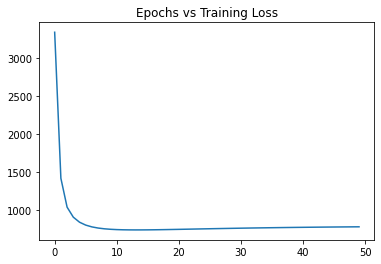

In [17]:
plt.plot([i for i in range(50)], all_losses)
plt.title("Epochs vs Training Loss")
plt.show()

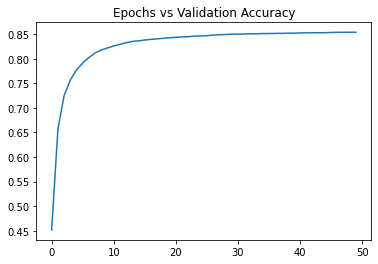

In [18]:
plt.plot([i for i in range(50)], all_evaluations)
plt.title("Epochs vs Validation Accuracy")
plt.show()

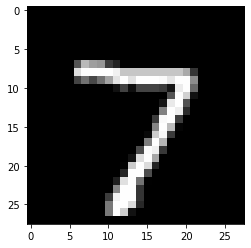

Predicted: 7
Actual: 7


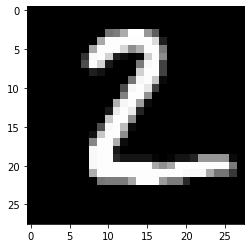

Predicted: 2
Actual: 2


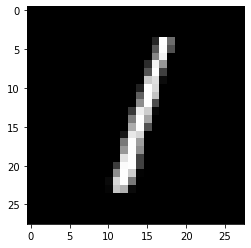

Predicted: 1
Actual: 1


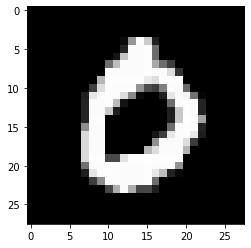

Predicted: 0
Actual: 0


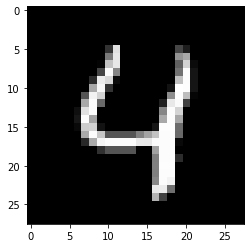

Predicted: 4
Actual: 4


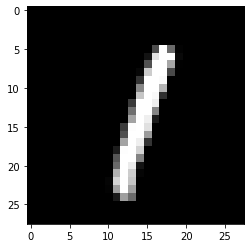

Predicted: 1
Actual: 1


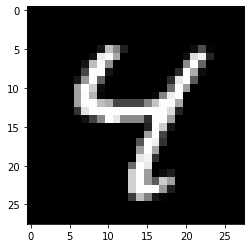

Predicted: 4
Actual: 4


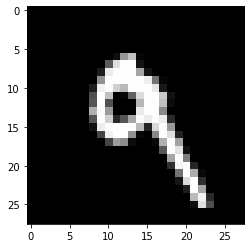

Predicted: 9
Actual: 9


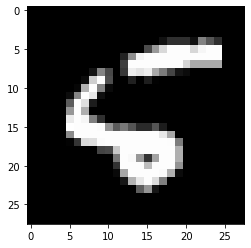

Predicted: 6
Actual: 5


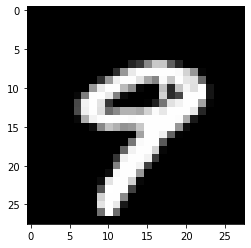

Predicted: 9
Actual: 9


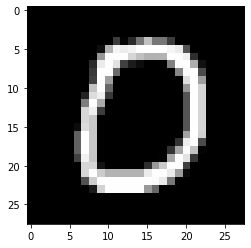

Predicted: 0
Actual: 0


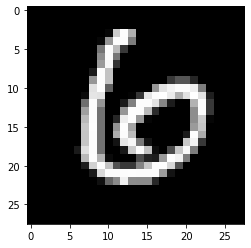

Predicted: 8
Actual: 6


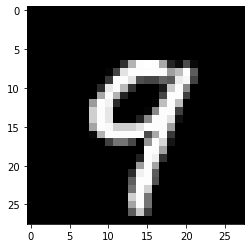

Predicted: 9
Actual: 9


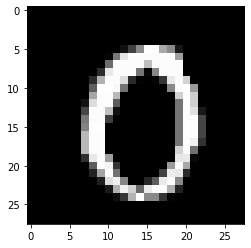

Predicted: 0
Actual: 0


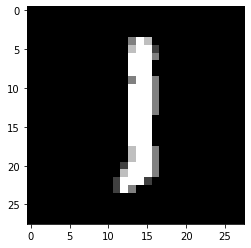

Predicted: 1
Actual: 1


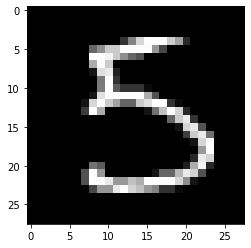

Predicted: 5
Actual: 5


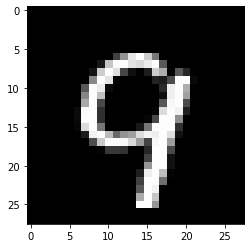

Predicted: 9
Actual: 9


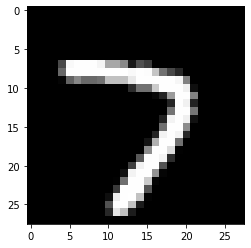

Predicted: 7
Actual: 7


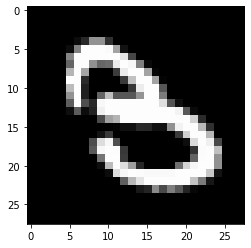

Predicted: 3
Actual: 3


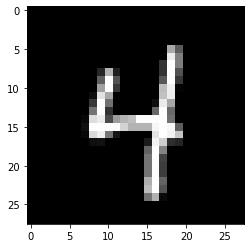

Predicted: 4
Actual: 4


In [19]:
for i in range(20):
    curr_data = test_data[i:i+1]
    curr_label = np.argmax(test_labels[i:i+1])
    plt.imshow(test_images[i], cmap="gray")
    plt.show()
    prob = forward(curr_data, w, b)[0]
    pred = np.argmax(prob)
    print(f"Predicted: {pred}")
    print(f"Actual: {curr_label}")

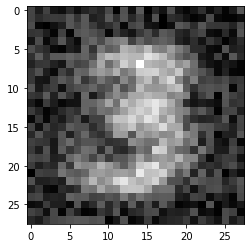

In [20]:
plt.imshow(w[3].reshape([28, 28]), cmap="gray")
plt.show()